## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:


In [334]:
#This is a regression problem because we are trying to predict a value based on some input parameters.

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [335]:
import warnings
warnings.filterwarnings('ignore')

## Question 2 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [336]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [337]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [338]:
students_df = pd.read_csv("students-data.csv", sep=';')
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [339]:
students_df.reset_index()
students_df['number'] = students_df.index
students_df.set_index('number', inplace=True)
print(students_df)

       school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
number                                                                 
0          GP   F   18       U     GT3       A     4     4   at_home   
1          GP   F   17       U     GT3       T     1     1   at_home   
2          GP   F   15       U     LE3       T     1     1   at_home   
3          GP   F   15       U     GT3       T     4     2    health   
4          GP   F   16       U     GT3       T     3     3     other   
5          GP   M   16       U     LE3       T     4     3  services   
6          GP   M   16       U     LE3       T     2     2     other   
7          GP   F   17       U     GT3       A     4     4     other   
8          GP   M   15       U     LE3       A     3     2  services   
9          GP   M   15       U     GT3       T     3     4     other   
10         GP   F   15       U     GT3       T     4     4   teacher   
11         GP   F   15       U     GT3       T     2     1  serv

In [340]:
students_df.count()
#no blanks found

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [341]:
students_df.isnull().sum(axis=1)

number
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
365    0
366    0
367    0
368    0
369    0
370    0
371    0
372    0
373    0
374    0
375    0
376    0
377    0
378    0
379    0
380    0
381    0
382    0
383    0
384    0
385    0
386    0
387    0
388    0
389    0
390    0
391    0
392    0
393    0
394    0
Length: 395, dtype: int64

In [342]:
students_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [343]:
students_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Transform Data

## Question 4

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [344]:
nonnum_df = students_df.select_dtypes(exclude=[np.number])
nonnum_df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Question 5 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

#### Answer:

In [345]:
backupstudents_df = students_df
students_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [346]:
students_df = students_df.drop(students_df.std()[students_df.std() < 1].index.values, axis=1)
students_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0
health,395.0,3.554430,1.390303,1.0,3.0,4.0,5.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 6 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [347]:
students_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [348]:
from sklearn.preprocessing import LabelEncoder

In [349]:
lb_make = LabelEncoder()
students_df["school_code"] = lb_make.fit_transform(students_df["school"])

In [350]:
students_df["sex_code"] = lb_make.fit_transform(students_df["sex"])

In [351]:
students_df["address_code"] = lb_make.fit_transform(students_df["address"])

In [352]:
students_df["famsize_code"] = lb_make.fit_transform(students_df["famsize"])

In [353]:
students_df["Mjob_code"] = lb_make.fit_transform(students_df["Mjob"])

In [354]:
students_df["Fjob_code"] = lb_make.fit_transform(students_df["Fjob"])

In [355]:
students_df["romantic_code"] = lb_make.fit_transform(students_df["romantic"])

In [356]:
students_df["reason_code"] = lb_make.fit_transform(students_df["reason"])

In [357]:
students_df["guardian_code"] = lb_make.fit_transform(students_df["guardian"])

In [358]:
students_df["schoolsup_code"] = lb_make.fit_transform(students_df["schoolsup"])

In [359]:
students_df["famsup_code"] = lb_make.fit_transform(students_df["famsup"])

In [360]:
students_df["paid_code"] = lb_make.fit_transform(students_df["paid"])

In [361]:
students_df["activities_code"] = lb_make.fit_transform(students_df["activities"])

In [362]:
students_df["nursery_code"] = lb_make.fit_transform(students_df["nursery"])

In [363]:
students_df["higher_code"] = lb_make.fit_transform(students_df["higher"])

In [364]:
students_df["internet_code"] = lb_make.fit_transform(students_df["internet"])

In [365]:
students_df[["sex","sex_code"]].head(15)

,sex,sex_code
number,,
0,F,0
1,F,0
2,F,0
3,F,0
4,F,0
5,M,1
6,M,1
7,F,0
8,M,1


In [366]:
students_df.dtypes

school             object
sex                object
age                 int64
address            object
famsize            object
Pstatus            object
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian           object
schoolsup          object
famsup             object
paid               object
activities         object
nursery            object
higher             object
internet           object
romantic           object
goout               int64
Walc                int64
health              int64
absences            int64
G1                  int64
G2                  int64
G3                  int64
school_code         int64
sex_code            int64
address_code        int64
famsize_code        int64
Mjob_code           int64
Fjob_code           int64
romantic_code       int64
reason_code         int64
guardian_code       int64
schoolsup_code      int64
famsup_code         int64
paid_code   

In [367]:
studnum_df = students_df.select_dtypes(include=[np.number])
studnum_df.columns

Index(['age', 'Medu', 'Fedu', 'goout', 'Walc', 'health', 'absences', 'G1',
       'G2', 'G3', 'school_code', 'sex_code', 'address_code', 'famsize_code',
       'Mjob_code', 'Fjob_code', 'romantic_code', 'reason_code',
       'guardian_code', 'schoolsup_code', 'famsup_code', 'paid_code',
       'activities_code', 'nursery_code', 'higher_code', 'internet_code'],
      dtype='object')

## Question 8 

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

#### Answer:

In [368]:
X = studnum_df.drop('G3', axis=1)

Y = studnum_df[['G3']]


In [369]:
X.head(10)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,school_code,...,romantic_code,reason_code,guardian_code,schoolsup_code,famsup_code,paid_code,activities_code,nursery_code,higher_code,internet_code
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,0,...,0,0,1,1,0,0,0,1,1,0
1,17,1,1,3,1,3,4,5,5,0,...,0,0,0,0,1,0,0,0,1,1
2,15,1,1,2,3,3,10,7,8,0,...,0,2,1,1,0,1,0,1,1,1
3,15,4,2,2,1,5,2,15,14,0,...,1,1,1,0,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,0,...,0,1,0,0,1,1,0,1,1,0
5,16,4,3,2,2,5,10,15,15,0,...,0,3,1,0,1,1,1,1,1,1
6,16,2,2,4,1,3,0,12,12,0,...,0,1,1,0,0,0,0,1,1,1
7,17,4,4,4,1,1,6,6,5,0,...,0,1,1,1,1,0,0,1,1,0
8,15,3,2,2,1,1,0,16,18,0,...,0,1,1,0,1,1,0,1,1,1


In [370]:
Y.head(10)

,G3
number,
0,6
1,6
2,10
3,15
4,10
5,15
6,11
7,6
8,19


## Question 9 - Analysis on given dataset 
Determine the following stats.

1) How many student's information is given?

2) How many features are given for each student?

3) How many students passed?

4) How many students failed?

5) Whats the rate of graduation?

#### Answer:


In [371]:
#1
studnum_df.shape[0]

395

In [372]:
#2
len(studnum_df.columns)

26

In [373]:
#3, 4
#Assume 40% pass mark
studnum_df["scores"]=np.where(studnum_df['G3']<8, 'F', 'P')
studnum_df['scores'].value_counts()

P    325
F     70
Name: scores, dtype: int64

In [374]:
studnum_df.describe()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,romantic_code,reason_code,guardian_code,schoolsup_code,famsup_code,paid_code,activities_code,nursery_code,higher_code,internet_code
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,3.108861,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,...,0.334177,1.255696,0.853165,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911
std,1.276043,1.094735,1.088201,1.113278,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,...,0.472300,1.208236,0.536684,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,2.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,17.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,18.000000,4.000000,3.000000,4.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,...,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualization

## Question 10

*Plot G2 and G3 and give your understanding on relation between both variables.*

#### Answer:

In [375]:
studnum_df[["G2","G3"]].head(10)

,G2,G3
number,,
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10
5,15,15
6,12,11
7,5,6
8,18,19


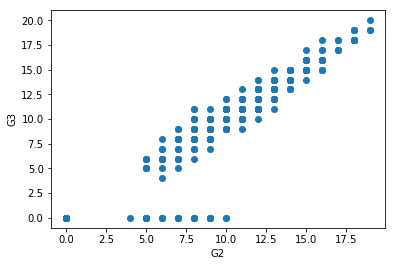

In [376]:
plt.xlabel("G2")
plt.ylabel("G3")
plt.scatter(studnum_df['G2'], studnum_df['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 11

*Plot the number of students in each school and number of students with different ages in separate plots.*

#### Answer:

## Question 12 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [377]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=1)

In [378]:
X_train.shape[0]

300

In [379]:
X_test.shape[0]

95

## Question 13 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [380]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print(model_score)

0.2631578947368421


## Question 14 - Correlation with target variable

Find the correlation of all independent variables with dependent varible and drop variables whose correlation lies in the range -0.1 to 0.1. 

#### Answer:

In [381]:
del studnum_df['scores']

In [382]:
studnum_df.head(3)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,romantic_code,reason_code,guardian_code,schoolsup_code,famsup_code,paid_code,activities_code,nursery_code,higher_code,internet_code
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,0,0,1,1,0,0,0,1,1,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,0,1,0,0,0,1,1
2,15,1,1,2,3,3,10,7,8,10,...,0,2,1,1,0,1,0,1,1,1


In [383]:
studnum_df.corr()['G3']
test_stud=studnum_df

In [384]:
test_stud.corr()['G3']

age               -0.161579
Medu               0.217147
Fedu               0.152457
goout             -0.132791
Walc              -0.051939
health            -0.061335
absences           0.034247
G1                 0.801468
G2                 0.904868
G3                 1.000000
school_code       -0.045017
sex_code           0.103456
address_code       0.105756
famsize_code       0.081407
Mjob_code          0.102082
Fjob_code          0.042286
romantic_code     -0.129970
reason_code        0.121994
guardian_code     -0.070109
schoolsup_code    -0.082788
famsup_code       -0.039157
paid_code          0.101996
activities_code    0.016100
nursery_code       0.051568
higher_code        0.182465
internet_code      0.098483
Name: G3, dtype: float64

In [385]:
del test_stud['Walc']

In [386]:
del test_stud['health']

In [387]:
del test_stud['absences']

In [388]:
del test_stud['internet_code']

In [389]:
del test_stud['school_code']

In [390]:
del test_stud['famsize_code']

In [391]:
del test_stud['Fjob_code']

In [392]:
del test_stud['guardian_code']

In [393]:
del test_stud['schoolsup_code']

In [394]:
del test_stud['famsup_code']

In [395]:
del test_stud['nursery_code']

In [396]:
del test_stud['activities_code']

In [397]:
test_stud

,age,Medu,Fedu,goout,G1,G2,G3,sex_code,address_code,Mjob_code,romantic_code,reason_code,paid_code,higher_code
number,,,,,,,,,,,,,,
0,18,4,4,4,5,6,6,0,1,0,0,0,0,1
1,17,1,1,3,5,5,6,0,1,0,0,0,0,1
2,15,1,1,2,7,8,10,0,1,0,0,2,1,1
3,15,4,2,2,15,14,15,0,1,1,1,1,1,1
4,16,3,3,2,6,10,10,0,1,2,0,1,1,1
5,16,4,3,2,15,15,15,1,1,3,0,3,1,1
6,16,2,2,4,12,12,11,1,1,2,0,1,0,1
7,17,4,4,4,6,5,6,0,1,2,0,1,0,1
8,15,3,2,2,16,18,19,1,1,3,0,1,1,1


## Question 15

*Plot the scatter matrix with the remaining independent variables.*

#### Answer:

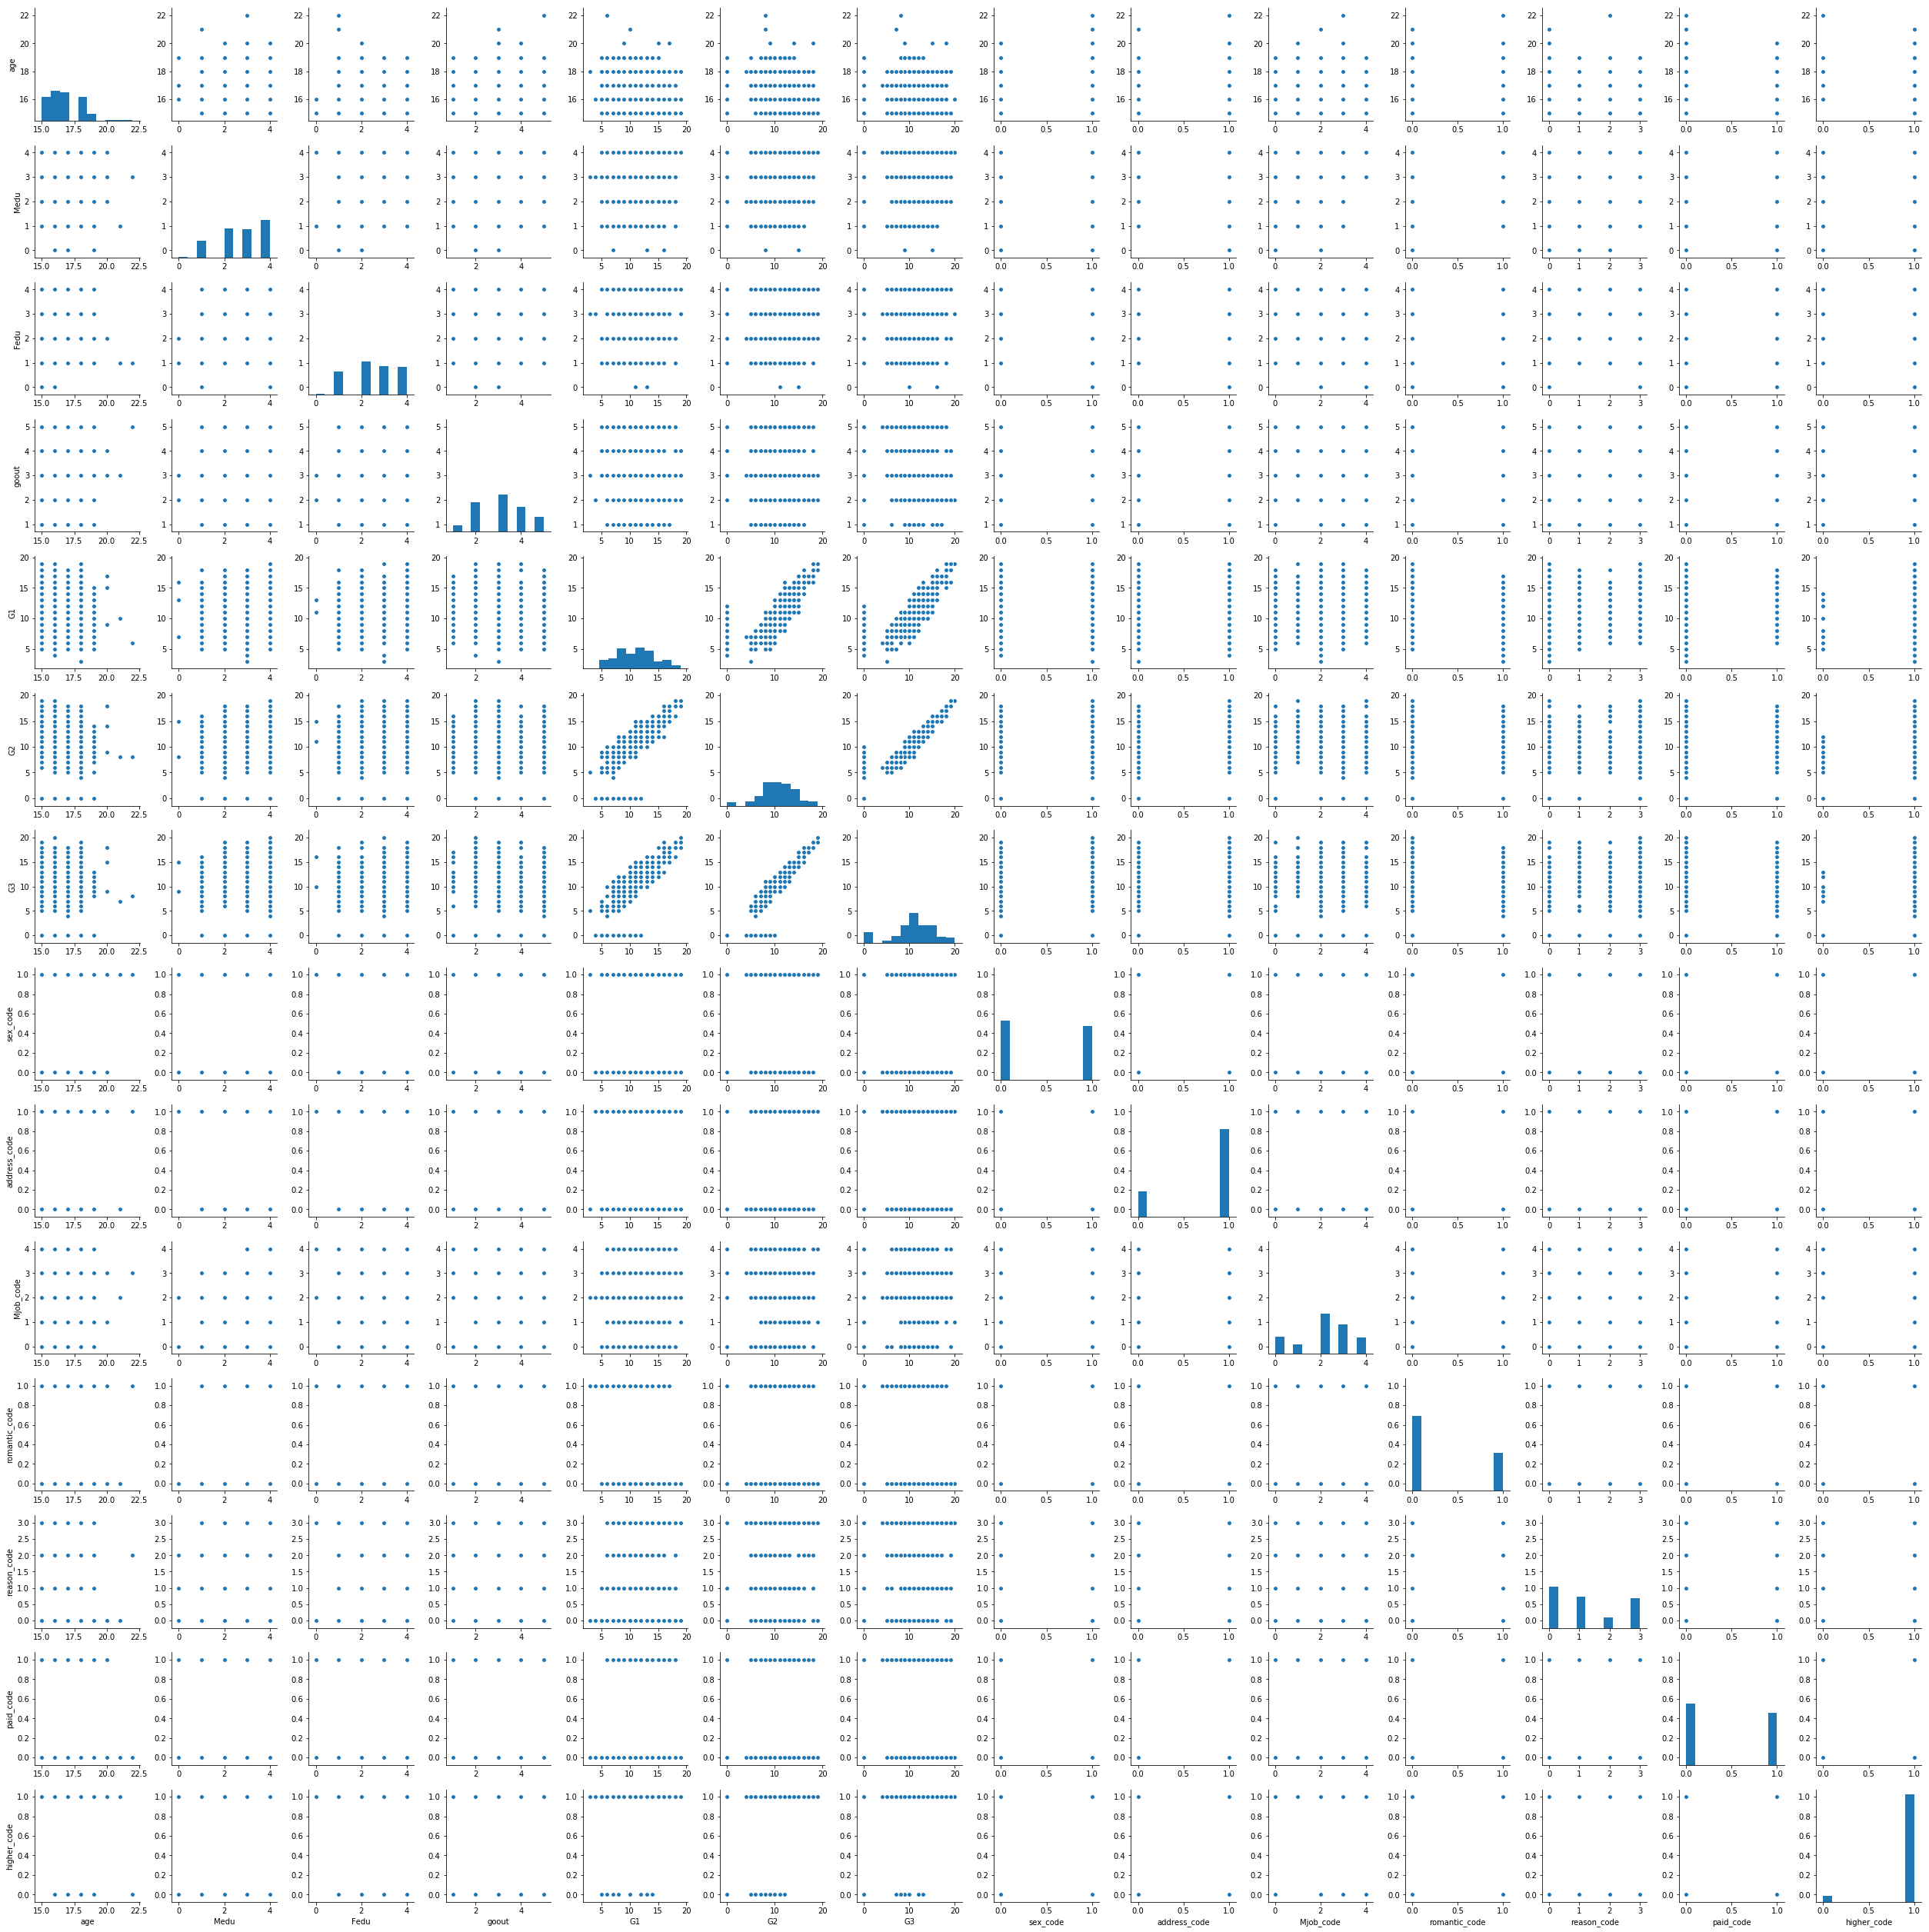

In [321]:
sns.pairplot(test_stud)

## Question 16

*Repeat 12,13 questions with the remaining independent variables from the above question.*

#### Answer:

In [398]:
test_stud2=test_stud

In [399]:
Y_New = test_stud2[['G3']]
X_New = test_stud2.drop(['G3'], axis=1)

In [400]:
X_New.head(2)

,age,Medu,Fedu,goout,G1,G2,sex_code,address_code,Mjob_code,romantic_code,reason_code,paid_code,higher_code
number,,,,,,,,,,,,,
0,18,4,4,4,5,6,0,1,0,0,0,0,1
1,17,1,1,3,5,5,0,1,0,0,0,0,1


In [401]:
from sklearn.model_selection import train_test_split

X_New_train, X_New_test, Y_New_train, Y_New_test = train_test_split(X_New, Y_New, test_size=95, random_state=1)

In [402]:
model = LogisticRegression()
model.fit(X_New_train, Y_New_train)
Y_New_predict = model.predict(X_New_test)
model_score = model.score(X_New_test, Y_New_test)
print(model_score)

0.23157894736842105


## Question 17 - Analysis on G1 and G2 independent variables

*Change the feature set by removing G1 and G2 attributes and Print Accuracy and F1 sore of Training and Test sets.*

#### Answer:

In [403]:
test_stud3=test_stud2

In [404]:
test_stud3.head(3)

,age,Medu,Fedu,goout,G1,G2,G3,sex_code,address_code,Mjob_code,romantic_code,reason_code,paid_code,higher_code
number,,,,,,,,,,,,,,
0,18,4,4,4,5,6,6,0,1,0,0,0,0,1
1,17,1,1,3,5,5,6,0,1,0,0,0,0,1
2,15,1,1,2,7,8,10,0,1,0,0,2,1,1


In [405]:
del test_stud3['G1']

In [406]:
del test_stud3['G2']

In [407]:
test_stud2

,age,Medu,Fedu,goout,G3,sex_code,address_code,Mjob_code,romantic_code,reason_code,paid_code,higher_code
number,,,,,,,,,,,,
0,18,4,4,4,6,0,1,0,0,0,0,1
1,17,1,1,3,6,0,1,0,0,0,0,1
2,15,1,1,2,10,0,1,0,0,2,1,1
3,15,4,2,2,15,0,1,1,1,1,1,1
4,16,3,3,2,10,0,1,2,0,1,1,1
5,16,4,3,2,15,1,1,3,0,3,1,1
6,16,2,2,4,11,1,1,2,0,1,0,1
7,17,4,4,4,6,0,1,2,0,1,0,1
8,15,3,2,2,19,1,1,3,0,1,1,1


In [408]:
X_New1 = test_stud.drop('G3', axis=1)
#X_New1 = test_stud.drop('scores', axis=1)
#X_New1 = test_stud.drop('G1', axis=1)
#X_New1 = test_stud.drop('G2', axis=1)

Y_New1 = test_stud[['G3']]

In [409]:
X_New1

,age,Medu,Fedu,goout,sex_code,address_code,Mjob_code,romantic_code,reason_code,paid_code,higher_code
number,,,,,,,,,,,
0,18,4,4,4,0,1,0,0,0,0,1
1,17,1,1,3,0,1,0,0,0,0,1
2,15,1,1,2,0,1,0,0,2,1,1
3,15,4,2,2,0,1,1,1,1,1,1
4,16,3,3,2,0,1,2,0,1,1,1
5,16,4,3,2,1,1,3,0,3,1,1
6,16,2,2,4,1,1,2,0,1,0,1
7,17,4,4,4,0,1,2,0,1,0,1
8,15,3,2,2,1,1,3,0,1,1,1


In [410]:
from sklearn.model_selection import train_test_split

X_New_train, X_New_test, Y_New_train, Y_New_test = train_test_split(X_New1, Y_New1, test_size=95, random_state=1)

In [411]:
model = LogisticRegression()
model.fit(X_New_train, Y_New_train)
Y_New_predict = model.predict(X_New_test)
model_score = model.score(X_New_test, Y_New_test)
print(model_score)

0.11578947368421053


## Question 18

*In one or two sentences give reasoning about how G1 and G2 attributes are affecting the Accuracy and F1 scores.*

#### Answer:

In [ ]:
#G1 and G2 are critical in predicting the accuracy of the model and predicting the value of G3 as without thm the accuracy is dropping significantly